# <font color = "BLUE"> Projeto 3 - Identificador de pokémons para uma batalha </font>

#### Integrantes: 

Fernando Elias Sanches
   
Maurício Hiroki Ando


Theo Barbara Rodrigues


## <font color = "BLUE"> Importando os dados </font> 

In [28]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

pokedex=pd.read_csv("Pokemon.csv")

#Vamos separar 10 pokémons como teste, para testar o resultado da clusterização
a=pokedex[pokedex.Name=='Chimchar']
b=a.append(pokedex[pokedex.Name=='Infernape'])
c=b.append(pokedex[pokedex.Name=='Palkia'])
d=c.append(pokedex[pokedex.Name=='Darkrai'])
e=d.append(pokedex[pokedex.Name=='Magikarp'])
f=e.append(pokedex[pokedex.Name=='Moltres'])
g=f.append(pokedex[pokedex.Name=='Celebi'])
h=g.append(pokedex[pokedex.Name=='BlastoiseMega Blastoise'])
i=h.append(pokedex[pokedex.Name=='Diglett'])
teste=i.append(pokedex[pokedex.Name=='Spiritomb'])
teste.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False


In [2]:
#Como separamos uma parte que será testada pelo cluster, temos que tirá-los do dataframe de análise, que seria o pokedex
#menos o teste. Para remover, podemos observar os "índices numéricos de cada pokémon" 
pokedex=pokedex.drop([435,437,541,549,139,158,271,12,55,490])

## <font color = "BLUE"> Análise inicial os dados </font>

Pokémons disponíveis:790 (lembrando que 10 foram retirados com a finalidade de teste. Logo há 800 dados no total).


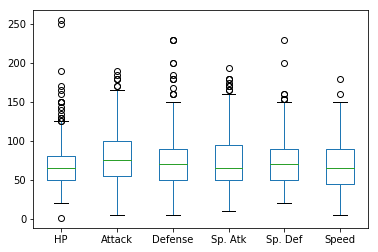

In [3]:
del(pokedex["#"])
del(pokedex["Total"])
del(pokedex["Generation"])
del(pokedex["Legendary"])
pokedex.plot.box();
print("Pokémons disponíveis:{} (lembrando que 10 foram retirados com a finalidade de teste. Logo há 800 dados no total).".format(len(pokedex)))

Nota-se que, através da análise dos atributos de ataque, defesa, velocidade, HP, ataque especial e defesa especial, podemos observar que a grande maioria dos pokémons se encontram dentro do interquantil. Podemos ver que são poucos os pokémons que estão fora da curva em cada atributo, dado que existem cerca de 790 pokémons no dataset do pokedex (mas 800 no total).

Nosso objetivo do projeto é, dado um pokémon adversário, identificar os pokémons mais fortes para a batalha. Será que o modelo seguiria um modelo de regressão, tentando prever um grupo de pokémons para uma batalha?

C:\Users\mauri\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


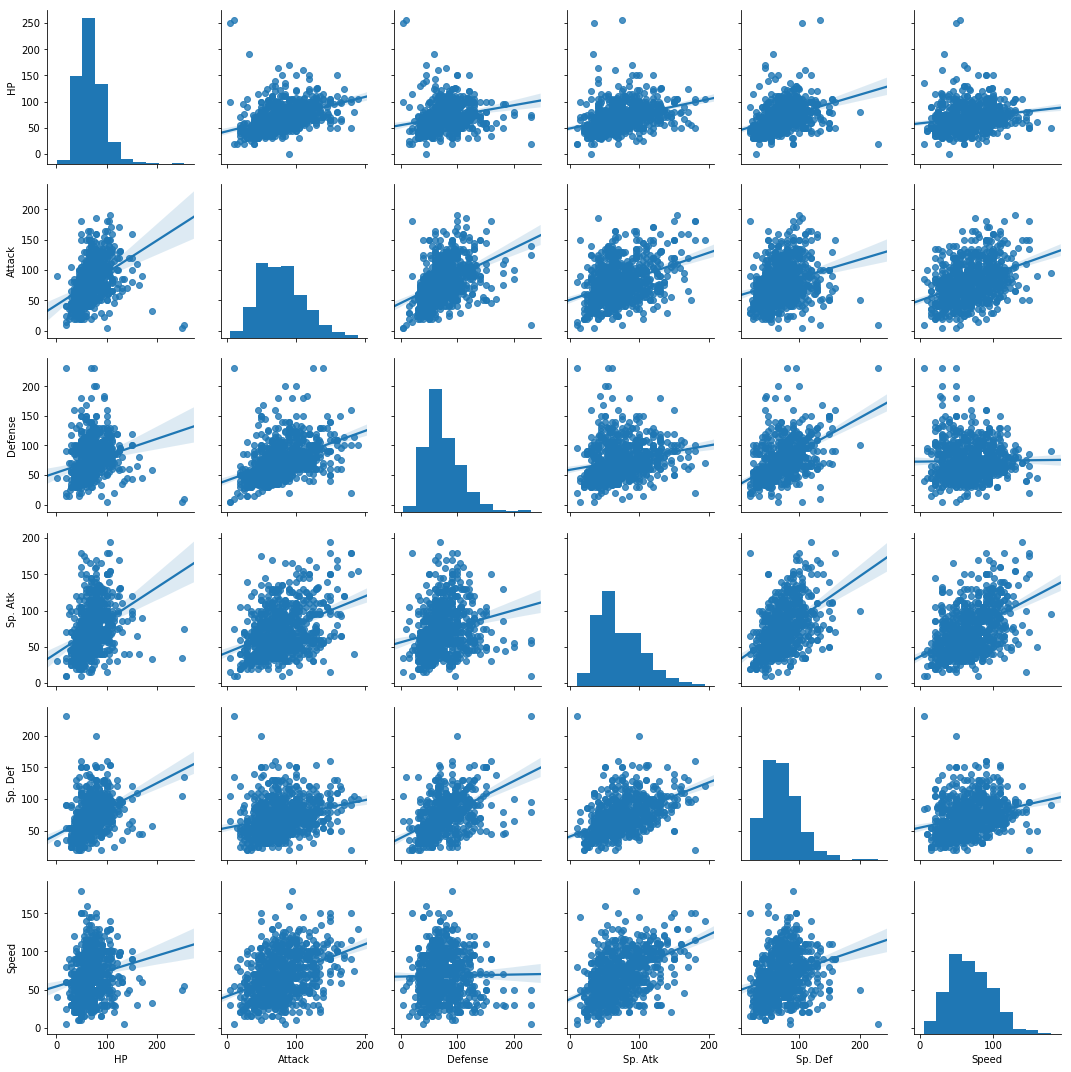

In [4]:
análise = pokedex.loc[:,("HP","Attack","Defense","Sp. Atk","Sp. Def","Speed")]
sns.pairplot(análise, kind = "reg")

 Analisando os dados por um seaborn, podemos analisar a reta de correlação para cada característica dos pokémons, em que em todos os gráficos, os dados estão muito dispersos ou aglomerados em torno de certos "x". Podemos concluir que não há relação entre os atributos e, portanto, para o nosso projeto, é melhor utilizar um programa de clustering. Assim, conseguiremos uma análise melhor do dataframe de pokémon. 
 
 Logo, o clustering é a melhor opção para nosso trabalho pois, estamos observando agrupamento de dados. De início, será interessante observar o comportamento de agrupamento de pokémons considerando apenas seus status. Mais para o final, respondendo a pergunta, teremos que agrupar os pokémons parecidos dado as características do pokémon adversário, tentando encontrar o grupo que melhor se destaca numa batalha contra tal adversário.

## <font color = "BLUE"> Clusterização dos dados </font>

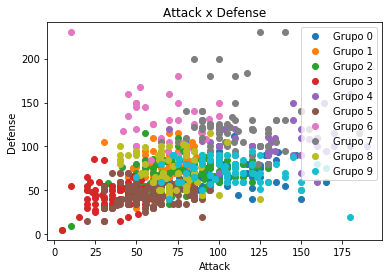

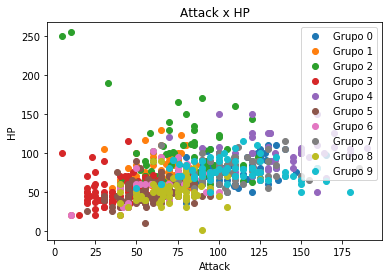

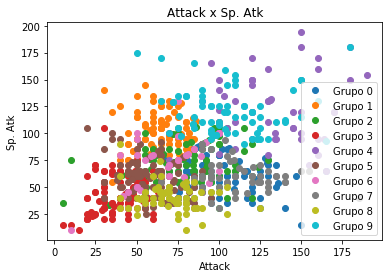

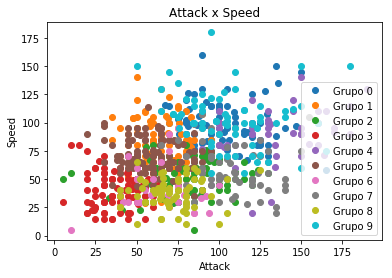

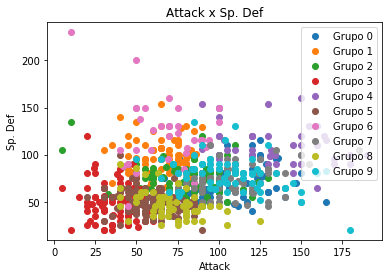

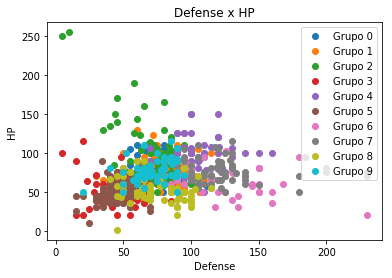

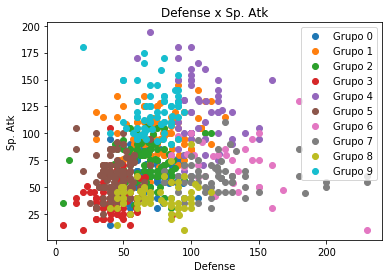

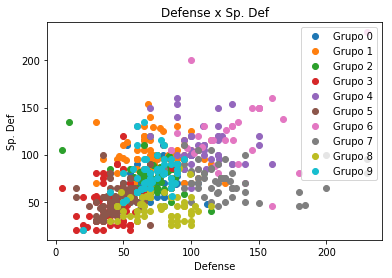

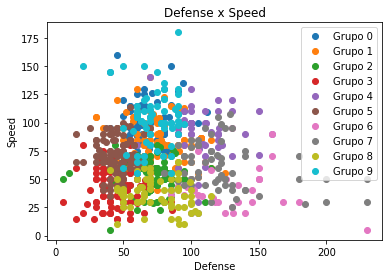

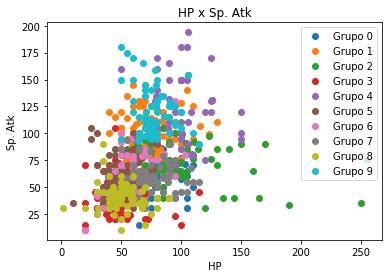

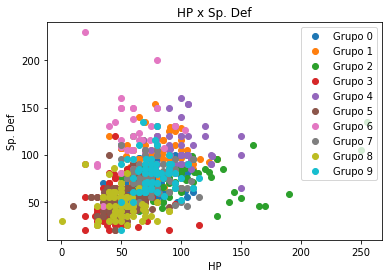

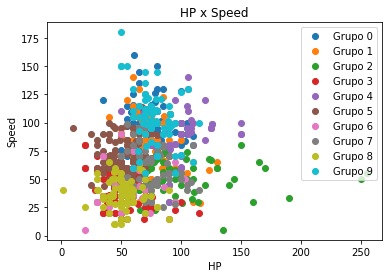

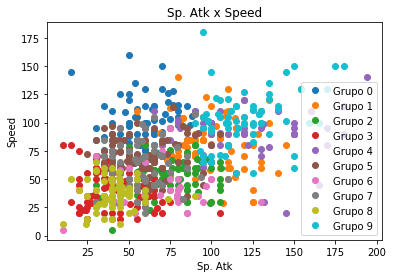

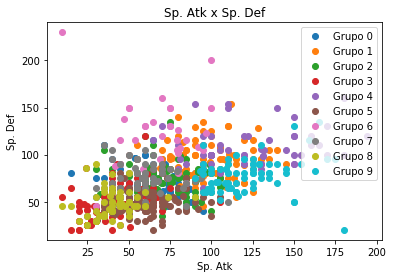

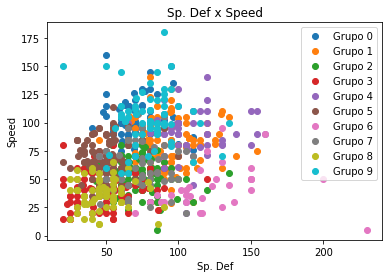

In [30]:
#Código baseado em "clustering_SKL.ipynb" da aula 27
#Analisaremos o comportamento dos clusters, comparado de dois a dois, com um total de 15 gráficos.

#Estamos agrupando os dados com base nos status
dados_entrada = pokedex.loc[:,("Attack", "Defense", "Sp. Atk","Sp. Def",'Speed',"HP")] 

#Com base na análise de que os iniciais tendem a ficar num mesmo grupo, os cães lendários em um mesmo grupo e que alguns pokémons
#Não possuem muita variação na evolução e, portanto, ficariam num mesmo grupo como Weedle e Kakuna, o número ideal de clusters
#São 10 clusters
ten_means = cluster.MiniBatchKMeans(n_clusters=10) 

ten_means.fit(dados_entrada)
saida = ten_means.predict(dados_entrada)
conjunto = dados_entrada.copy()
conjunto["saida"] = saida
pokedex['saida'] = saida

grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]
grupo3 = conjunto[conjunto.saida==3]
grupo4 = conjunto[conjunto.saida==4]
grupo5 = conjunto[conjunto.saida==5]
grupo6 = conjunto[conjunto.saida==6]
grupo7 = conjunto[conjunto.saida==7]
grupo8 = conjunto[conjunto.saida==8]
grupo9 = conjunto[conjunto.saida==9]
grupo10 = conjunto[conjunto.saida==10]

#Comparar de dois a dois (combinação de 6 dois a dois)
def plota_grafico(atributo1, atributo2):
    plt.plot(grupo0["{}".format(atributo1)], grupo0["{}".format(atributo2)], "o", label='Grupo 0')
    plt.plot(grupo1["{}".format(atributo1)], grupo1["{}".format(atributo2)], "o", label='Grupo 1')
    plt.plot(grupo2["{}".format(atributo1)], grupo2["{}".format(atributo2)], "o", label='Grupo 2')
    plt.plot(grupo3["{}".format(atributo1)], grupo3["{}".format(atributo2)], "o", label='Grupo 3')
    plt.plot(grupo4["{}".format(atributo1)], grupo4["{}".format(atributo2)], "o", label='Grupo 4')
    plt.plot(grupo5["{}".format(atributo1)], grupo5["{}".format(atributo2)], "o", label='Grupo 5')
    plt.plot(grupo6["{}".format(atributo1)], grupo6["{}".format(atributo2)], "o", label='Grupo 6')
    plt.plot(grupo7["{}".format(atributo1)], grupo7["{}".format(atributo2)], "o", label='Grupo 7')
    plt.plot(grupo8["{}".format(atributo1)], grupo8["{}".format(atributo2)], "o", label='Grupo 8')
    plt.plot(grupo9["{}".format(atributo1)], grupo9["{}".format(atributo2)], "o", label='Grupo 9') 
    plt.xlabel("{}".format(atributo1))
    plt.ylabel("{}".format(atributo2))
    plt.title("{} x {}".format(atributo1,atributo2))
    plt.legend()
    plt.show()
plota_grafico("Attack","Defense")
plota_grafico("Attack","HP")
plota_grafico("Attack","Sp. Atk")
plota_grafico("Attack", "Speed")
plota_grafico("Attack","Sp. Def")
plota_grafico("Defense","HP")
plota_grafico("Defense","Sp. Atk")
plota_grafico("Defense","Sp. Def")
plota_grafico("Defense","Speed")
plota_grafico("HP", "Sp. Atk")
plota_grafico("HP","Sp. Def")
plota_grafico("HP", "Speed")
plota_grafico("Sp. Atk","Speed")
plota_grafico("Sp. Atk", "Sp. Def")
plota_grafico("Sp. Def", "Speed")

Após alguns testes com os clusters, encontramos um valor de 10 clusters para análise como um bom parâmetro, pois ele separa bem os pokémons, como por exemplo, a maioria dos pokémons lendários fortes ficam no mesmo grupo; o que já é defasado para clusters diferentes de 10. Foi possível notar, também, que cada vez que o código é rodado, um resultado diferente é obtido. Por exemplo, para 10 clusters, ora o charmander, squirtle e bulbasaur estão no mesmo grupo, ora não. 

In [31]:
pokedex[pokedex.saida==0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,0
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False,0
25,20,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False,0
27,22,Fearow,Normal,Flying,442,65,90,65,61,61,100,1,False,0
29,24,Arbok,Poison,NaN,438,60,85,69,65,79,80,1,False,0
31,26,Raichu,Electric,NaN,485,60,90,55,90,80,110,1,False,0
39,34,Nidoking,Poison,Ground,505,81,102,77,85,75,85,1,False,0
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False,0
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False,0
58,53,Persian,Normal,NaN,440,65,70,60,65,65,115,1,False,0


In [32]:
pokedex[pokedex.saida==1]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,1
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False,1
41,36,Clefable,Fairy,NaN,483,95,70,73,95,90,60,1,False,1
43,38,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,False,1
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False,1
54,49,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1,False,1
60,55,Golduck,Water,NaN,500,80,82,78,95,80,85,1,False,1
69,64,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,1,False,1
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False,1


In [33]:
pokedex[pokedex.saida==2]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,2
35,30,Nidorina,Poison,NaN,365,70,62,67,55,55,56,1,False,2
36,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76,1,False,2
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,2
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False,2
52,47,Parasect,Bug,Grass,405,60,95,80,60,80,30,1,False,2
73,67,Machoke,Fighting,NaN,405,80,100,70,50,60,45,1,False,2
76,70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,1,False,2
86,80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,1,False,2


In [34]:
pokedex[pokedex.saida==3]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,3
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,3
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,3
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False,3
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False,3
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False,3
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False,3
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,3
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,3
40,35,Clefairy,Fairy,NaN,323,70,45,48,60,65,35,1,False,3


In [35]:
pokedex[pokedex.saida==4]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,4
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,4
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,4
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False,4
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False,4
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,4
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,4
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False,4
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False,4
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False,4


In [36]:
pokedex[pokedex.saida==5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,5
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,5
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False,5
21,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False,5
24,19,Rattata,Normal,NaN,253,30,56,35,25,35,72,1,False,5
26,21,Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False,5
28,23,Ekans,Poison,NaN,288,35,60,44,40,54,55,1,False,5
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False,5
38,33,Nidorino,Poison,NaN,365,61,72,57,55,55,65,1,False,5
42,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False,5


In [37]:
pokedex[pokedex.saida==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False,6
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False,6
190,176,Togetic,Fairy,Flying,405,55,40,85,80,105,40,2,False,6
212,197,Umbreon,Dark,NaN,525,95,65,110,60,130,65,2,False,6
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,6
237,219,Magcargo,Fire,Rock,410,50,50,120,80,80,30,2,False,6
323,299,Nosepass,Rock,NaN,375,30,45,135,45,90,30,3,False,6
327,302,SableyeMega Sableye,Dark,Ghost,480,50,85,125,85,115,20,3,False,6
355,324,Torkoal,Fire,NaN,470,70,85,140,85,70,20,3,False,6
376,344,Claydol,Ground,Psychic,500,60,70,105,70,120,75,3,False,6


In [38]:
pokedex[pokedex.saida==7]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
33,28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False,7
67,62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False,7
74,68,Machamp,Fighting,NaN,505,90,130,80,65,85,55,1,False,7
82,76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False,7
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,7
107,99,Kingler,Water,NaN,475,55,130,115,50,50,75,1,False,7
113,105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False,7
118,110,Weezing,Poison,NaN,490,65,90,120,85,70,60,1,False,7
120,112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False,7
136,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False,7


In [39]:
pokedex[pokedex.saida==8]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
32,27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False,8
51,46,Paras,Bug,Grass,285,35,70,55,45,55,25,1,False,8
72,66,Machop,Fighting,NaN,305,70,80,50,35,35,35,1,False,8
80,74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False,8
81,75,Graveler,Rock,Ground,390,55,95,115,45,45,35,1,False,8
85,79,Slowpoke,Water,Psychic,315,90,65,65,40,40,15,1,False,8
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False,8
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False,8
106,98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False,8
110,102,Exeggcute,Grass,Psychic,325,60,40,80,60,45,40,1,False,8


In [40]:
pokedex[pokedex.saida==9]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,9
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,9
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False,9
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False,9
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False,9
77,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False,9
101,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False,9
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False,9
111,103,Exeggutor,Grass,Psychic,520,95,95,85,125,65,55,1,False,9
135,126,Magmar,Fire,NaN,495,65,95,57,100,85,93,1,False,9


In [41]:
pokemon = input("Digite o nome do pokémon, com letra maiúscula: ")
grupo_repetido=[]
grupo_solo=[]
saida_do_pokemon=(pokedex[pokedex.Name==pokemon].saida)
if len(saida_do_pokemon)!=0:
    for element in pokedex.saida:
        if element == int(saida_do_pokemon):
            nome_real = pokedex[pokedex["saida"]==element].Name
            grupo_repetido.append(nome_real)
    for p in grupo_repetido[0]:
        grupo_solo.append(p)
    print("Os pokémons parecidos com {} são: {}".format(pokemon, grupo_solo))
else:
    print("Esse pokémon não existe ou o nome foi digitado de forma incorreta.")

Digite o nome do pokémon, com letra maiúscula: l
Esse pokémon não existe ou o nome foi digitado de forma incorreta.


Como já dito antes, o nosso objetivo não é identificar grupos parecidos de acordo com status, mas sim, pokémons parecidos na seguinte situação: dado um pokémon adversário, quais seriam os melhores pokémons para a batalha? Para responder tal pergunta, será necessário encontrar o ponto fraco, ponto forte e ataques sem efeitos de cada pokémon. 

## <font color="BLUE"> Identificando os ponto fracos dos pokémons </font>

In [17]:
Pokemons={'Fairy':[],'Grass':[],'Fire':[],'Flying':[],'Dark':[],'Ghost':[],'Psychic':[],'Bug':[],'Dragon':[],'Ice':[],\
          'Electric':[],'Poison':[],'Rock':[],'Ground':[],'Steel':[],'Normal':[],'Water':[],'Fighting':[]}

#Separação do pokémon por tipo
def ClassificaPokemon(dicionario):
    for tipo in dicionario:
        for pokemon in pokedex.Name:
            linha=pokedex[pokedex.Name==pokemon]
            if linha['Type 1'].all()==tipo or linha['Type 2'].all()==tipo:
                dicionario[tipo].append(pokemon)
ClassificaPokemon(Pokemons)

In [18]:
#Dado um pokemon, identifica-se seu tipo composto (se tiver um tipo 2, por exemplo, tipo fire e tipo fighting)
def ClassificaTipoComposto(pokemon):
    tipo1=pokedex[pokedex.Name==pokemon]['Type 1'].all()
    tipo2=pokedex[pokedex.Name==pokemon]['Type 2'].all()
    return tipo1,tipo2


#Define o ponto fraco de cada tipo de pokemon. REferencias de fraqueza baseadas no site: https://pokemondb.net/type
def PontoFracoPorTipo(tipo):
    if tipo=='Fairy':
        ponto_fraco=['Poison','Steel']
        ponto_forte=['Fighting','Bug','Dark']
        no_effect=['Dragon']
    elif tipo=='Dragon':
        ponto_fraco=['Ice', 'Fairy', 'Dragon']
        ponto_forte=['Fire', 'Water', 'Electric', 'Grass']
        no_effect=['None']
    elif tipo=='Ground':
        ponto_fraco=['Water','Grass','Ice',]
        ponto_forte=['Poison', 'Rock']
        no_effect=['Electric']
    elif tipo=='Fire':
        ponto_fraco=['Water','Ground','Rock']
        ponto_forte=['Fire','Grass','Ice','Bug','Steel','Fairy']
        no_effect=['None']
    elif tipo=='Flying':
        ponto_fraco=['Electric','Ice','Rock']
        ponto_forte=['Grass','Fighting','Bug']
        no_effect=['Ground']
    elif tipo=='Dark':
        ponto_fraco=['Fighting','Bug','Fairy']
        ponto_forte=['Ghost','Dark']
        no_effect=['Psychic']
    elif tipo=='Ghost':
        ponto_fraco=['Ghost','Dark']
        ponto_forte=['Poison','Bug']
        no_effect=['Normal','Fighting']
    elif tipo=='Psychic':
        ponto_fraco=['Bug','Ghost','Dark']
        ponto_forte=['Fighting','Psychic']
        no_effect=['None']
    elif tipo=='Bug':
        ponto_fraco=['Fire', 'Flying','Rock']
        ponto_forte=['Grass','Fighting','Ground']
        no_effect=['None']
    elif tipo=='Ice':
        ponto_fraco=['Fighting','Fire','Rock','Steel']
        ponto_forte=['Ice']
        no_effect=['None']
    elif tipo=='Electric':
        ponto_fraco=['Ground']
        ponto_forte=['Electric','Steel', 'Flying']
        no_effect=['None']
    elif tipo=='Poison':
        ponto_fraco=['Psychic','Ground']
        ponto_forte=['Grass','Fighting','Poison','Bug','Fairy']
        no_effect=['None']
    elif tipo=='Rock':
        ponto_fraco=['Fighting','Ground','Water','Steel','Grass']
        ponto_forte=['Normal','Fire','Poison','Flying']
        no_effect=['None']
    elif tipo=='Grass':
        ponto_fraco=['Fire','Flying','Ice','Poison','Bug']
        ponto_forte=['Grass','Water','Electric','Ground']
        no_effect=['None']
    elif tipo=='Steel':
        ponto_fraco=['Fire','Fighting','Ground']
        ponto_forte=['Normal','Grass','Ice','Flying','Psychic','Bug','Rock','Dragon','Steel','Fairy']
        no_effect=['Poison']
    elif tipo=='Normal':
        ponto_fraco=['Fighting']
        ponto_forte=['None']
        no_effect=['Ghost']
    elif tipo=='Fighting':
        ponto_fraco=['Flying','Psychic','Fairy']
        ponto_forte=['Bug','Rock','Dark']
        no_effect=['None']
    elif tipo=='Water':
        ponto_fraco=['Grass','Electric']
        ponto_forte=['Water','Ice','Fire','Steel']
        no_effect=['None']
    else:
        ponto_fraco=['None']
        ponto_forte=['None']
        no_effect=['None']
    return ponto_fraco,ponto_forte,no_effect

In [19]:
#Dado um pokemon, retorna-se seu ponto fraco
def PontosReais(pokemon):
    tipos=ClassificaTipoComposto(pokemon)
    tipo1=tipos[0]
    tipo2=tipos[1]
    first=PontoFracoPorTipo(tipo1)
    second=PontoFracoPorTipo(tipo2)
    ponto_fraco_temporario=set(first[0]+second[0])
    ponto_forte_temporario=set(first[1]+second[1])
    resistencia=set(first[2]+second[2])
    ponto_fraco_real=[]
    ponto_forte_real=[]
    for elemento in ponto_fraco_temporario:
        if elemento not in second[1]:
            if elemento not in second[2]:
                if elemento not in first[1]:
                    if elemento not in first[2]:
                        ponto_fraco_real.append(elemento)
    for elemento in ponto_forte_temporario:
        if elemento not in second[0]:
            if elemento not in second[2]:
                if elemento not in first[0]:
                    if elemento not in first[2]:
                        ponto_forte_real.append(elemento)
    return ponto_fraco_real, ponto_forte_real,resistencia

print(PontosReais("Lapras"))

(['Rock', 'Grass', 'Fighting', 'Electric'], ['Water', 'Ice'], {'None'})


In [20]:
nova_tabela=pokedex.copy()
del(nova_tabela['Attack'])
del(nova_tabela['Sp. Atk'])
del(nova_tabela['saida'])

In [21]:
def Adapta_df(pokemon):
    nome_do_pokemon=(pokedex[pokedex.Name==pokemon])
    Ataque=[]
    Special_ataque=[]
    if len(nome_do_pokemon)!=0:
        weakness=PontosReais(pokemon)[0]
        strength = PontosReais(pokemon)[1]
        super_resistance=PontosReais(pokemon)[2]
#         print("Weakness:{}\nStrength:{}\nResistance:{}".format(weakness,strength,super_resistance))
        for pocket_monster in nova_tabela.Name:
            tipo1,tipo2=ClassificaTipoComposto(pocket_monster)
            if tipo1 in weakness or tipo2 in weakness:
                Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack)*2)
                Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"])*2)
            elif tipo1 in strength or tipo2 in strength:
                Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack)*(1/2))
                Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"])*(1/2))
            elif tipo1 in super_resistance or tipo2 in super_resistance:
                Ataque.append(0)
                Special_ataque.append(0)
            else:
                Ataque.append(int(pokedex[pokedex['Name']==pocket_monster].Attack))
                Special_ataque.append(int(pokedex[pokedex['Name']==pocket_monster]["Sp. Atk"]))
        nova_tabela['Attack']=Ataque
        nova_tabela['Sp. Atk']=Special_ataque
        return nova_tabela
    else:
        return("Pokémon não encontrado. Verifique se a escrita está correta.")

In [22]:
nova_tabela

,Name,Type 1,Type 2,HP,Defense,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,65,45
1,Ivysaur,Grass,Poison,60,63,80,60
2,Venusaur,Grass,Poison,80,83,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,123,120,80
4,Charmander,Fire,NaN,39,43,50,65
5,Charmeleon,Fire,NaN,58,58,65,80
6,Charizard,Fire,Flying,78,78,85,100
7,CharizardMega Charizard X,Fire,Dragon,78,111,85,100
8,CharizardMega Charizard Y,Fire,Flying,78,78,115,100
9,Squirtle,Water,NaN,44,65,64,43


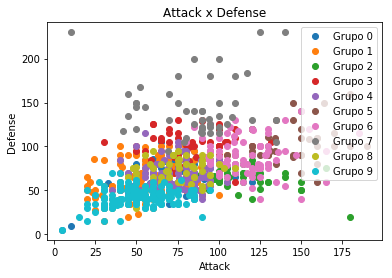

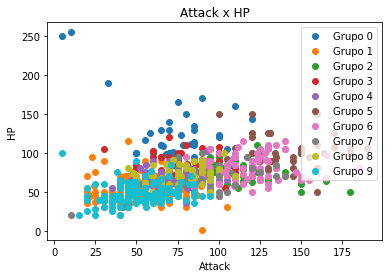

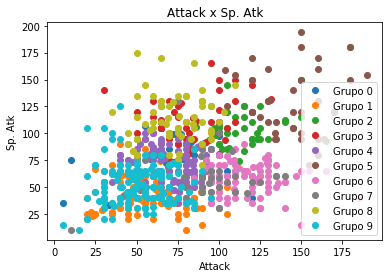

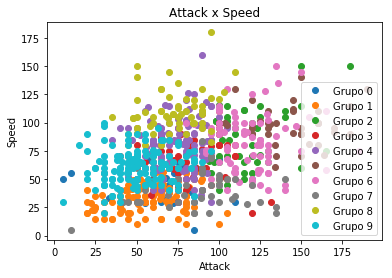

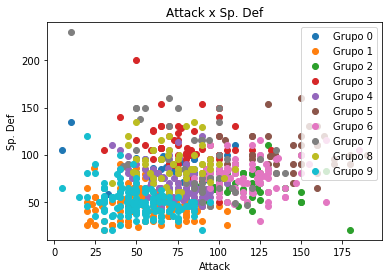

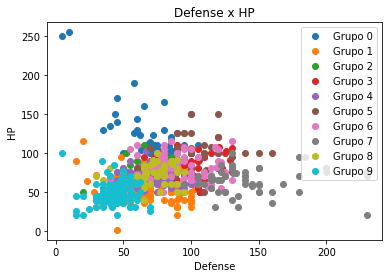

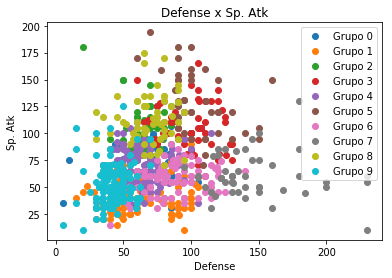

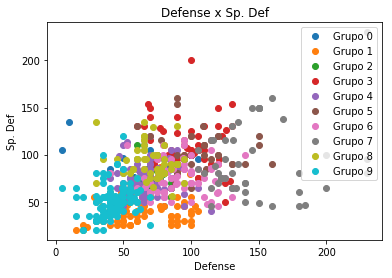

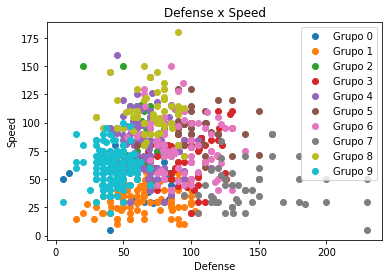

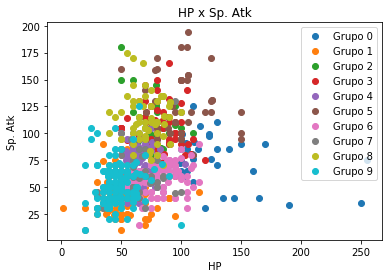

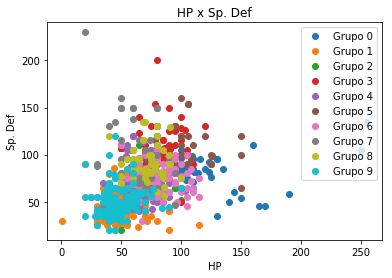

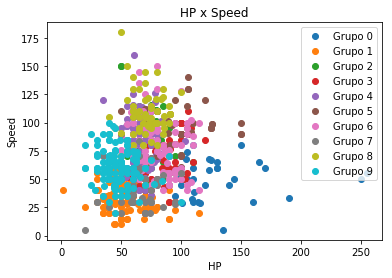

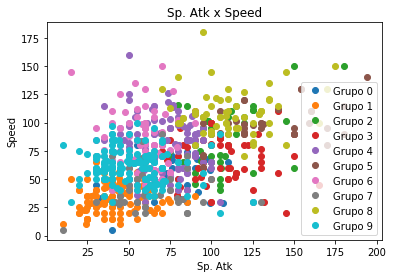

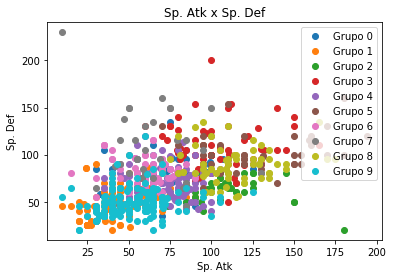

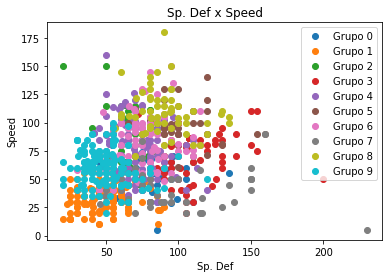

In [23]:
def Cluster (tabela):
    dados_entrada = tabela.loc[:,("Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "HP")] #Estamos agrupando os dados com base nos status
    ten_means = cluster.MiniBatchKMeans(n_clusters=10)
    ten_means.fit(dados_entrada)
    saida = ten_means.predict(dados_entrada)
    conjunto = dados_entrada.copy()
    conjunto["saida"] = saida
    tabela['saida'] = saida
    return tabela


grupo0 = conjunto[conjunto.saida==0]
grupo1 = conjunto[conjunto.saida==1]
grupo2 = conjunto[conjunto.saida==2]
grupo3 = conjunto[conjunto.saida==3]
grupo4 = conjunto[conjunto.saida==4]
grupo5 = conjunto[conjunto.saida==5]
grupo6 = conjunto[conjunto.saida==6]
grupo7 = conjunto[conjunto.saida==7]
grupo8 = conjunto[conjunto.saida==8]
grupo9 = conjunto[conjunto.saida==9]
# grupo10 = conjunto[conjunto.saida==10]
# grupo11 = conjunto[conjunto.saida==11]
# grupo12 = conjunto[conjunto.saida==12]
# grupo13 = conjunto[conjunto.saida==13]
# grupo14 = conjunto[conjunto.saida==14]
# grupo15 = conjunto[conjunto.saida==15]
# grupo16 = conjunto[conjunto.saida==16]
# grupo17 = conjunto[conjunto.saida==17]
# grupo18 = conjunto[conjunto.saida==18]
# grupo19 = conjunto[conjunto.saida==19]
# grupo20 = conjunto[conjunto.saida==20]
# grupo21 = conjunto[conjunto.saida==21]
# grupo22 = conjunto[conjunto.saida==22]
# grupo23 = conjunto[conjunto.saida==23]
# grupo24 = conjunto[conjunto.saida==24]

plota_grafico("Attack","Defense")
plota_grafico("Attack","HP")
plota_grafico("Attack","Sp. Atk")
plota_grafico("Attack", "Speed")
plota_grafico("Attack","Sp. Def")
plota_grafico("Defense","HP")
plota_grafico("Defense","Sp. Atk")
plota_grafico("Defense","Sp. Def")
plota_grafico("Defense","Speed")
plota_grafico("HP", "Sp. Atk")
plota_grafico("HP","Sp. Def")
plota_grafico("HP", "Speed")
plota_grafico("Sp. Atk","Speed")
plota_grafico("Sp. Atk", "Sp. Def")
plota_grafico("Sp. Def", "Speed")

In [26]:
#Resultado final obtido
#Devolvendo o melhor grupo de pokémons para batalhar com um pokémon a escolha do leitor:
pokemon = input("Qual seu pokémon adversário? ")
tabela = Adapta_df(pokemon)
tabela_cluster = Cluster(tabela)
grupo_repetido=[]
grupo_solo=[]
ataque_max = tabela_cluster.sort_values(by="Attack")["Attack"].max()
saida_do_pokemon=(tabela_cluster[tabela_cluster.Attack==ataque_max].saida)
if len(saida_do_pokemon)!=0:
    for element in tabela_cluster.saida:
        if element == int(saida_do_pokemon):
            nome_real = tabela_cluster[tabela_cluster["saida"]==element].Name
            grupo_repetido.append(nome_real)
    for p in grupo_repetido[0]:
        grupo_solo.append(p)
    print("Os melhores pokémons contra {} são: {}".format(pokemon, grupo_solo))
else:
    print("Esse pokémon não existe ou o nome foi digitado de forma incorreta ou ainda ele foi reservado para a parte teste.")


Qual seu pokémon adversário? Volcarona
Os melhores pokémons contra Volcarona são: ['CharizardMega Charizard Y', 'Dragonite', 'Tyranitar', 'TyranitarMega Tyranitar', 'Ho-oh', 'SwampertMega Swampert', 'SharpedoMega Sharpedo', 'Salamence', 'SalamenceMega Salamence', 'Kyogre', 'KyogrePrimal Kyogre', 'Rayquaza', 'RayquazaMega Rayquaza', 'Honchkrow', 'Archeops', 'TornadusIncarnate Forme', 'ThundurusIncarnate Forme', 'ThundurusTherian Forme', 'LandorusIncarnate Forme', 'LandorusTherian Forme', 'Yveltal', 'DiancieMega Diancie', 'Volcanion']


### <font color= "BLUE"> Analisando a parte teste com cluster

Analisamos todo o dataset com clusterização de 790 pokémons. Por que tínhamos separado 10 pokémons, ou ainda, pokémons para a parte teste? Isso é utilizado para validar nossa clusterização , ou ainda, dizer se ele é eficaz ou não. Para isso, devemos classificar esses 10 pokémons. 

In [46]:
Cluster(teste)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,saida
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False,1
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False,6
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True,8
549,491,Darkrai,Dark,NaN,600,70,90,90,135,90,125,4,True,7
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,3
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,9
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,2
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False,4
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False,5
490,442,Spiritomb,Ghost,Dark,485,50,92,108,92,108,35,4,False,0


## <font color = "BLUE"> Conclusão 

Qual seu pokémon adversário? Mewtwo
Os melhores pokémons contra Mewtwo são: ['BeedrillMega Beedrill', 'Scyther', 'Pinsir', 'PinsirMega Pinsir', 'GyaradosMega Gyarados', 'Scizor', 'ScizorMega Scizor', 'Heracross', 'HeracrossMega Heracross', 'Tyranitar', 'TyranitarMega Tyranitar', 'Crawdaunt', 'Armaldo', 'Banette', 'BanetteMega Banette', 'Absol', 'Weavile', 'Krookodile', 'Escavalier', 'Golurk', 'Bisharp', 'Durant', 'Pangoro', 'Doublade', 'Trevenant']
